# Evolutionary Algorithms

An example of evolutionary algorithms, trying to solve the traveling salesman problem. https://en.wikipedia.org/wiki/Travelling_salesman_problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import sys
import matplotlib
libraries = (('Matplotlib', matplotlib), ('Numpy', np))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.12.1


{0: [-25.091976230527507, 90.142861281983244], 1: [46.39878836228101, 19.73169683940732], 2: [-68.79627191151269, -68.801095932759466], 3: [-88.383277566360107, 73.235229154987024], 4: [20.223002348641756, 41.61451555920911]}


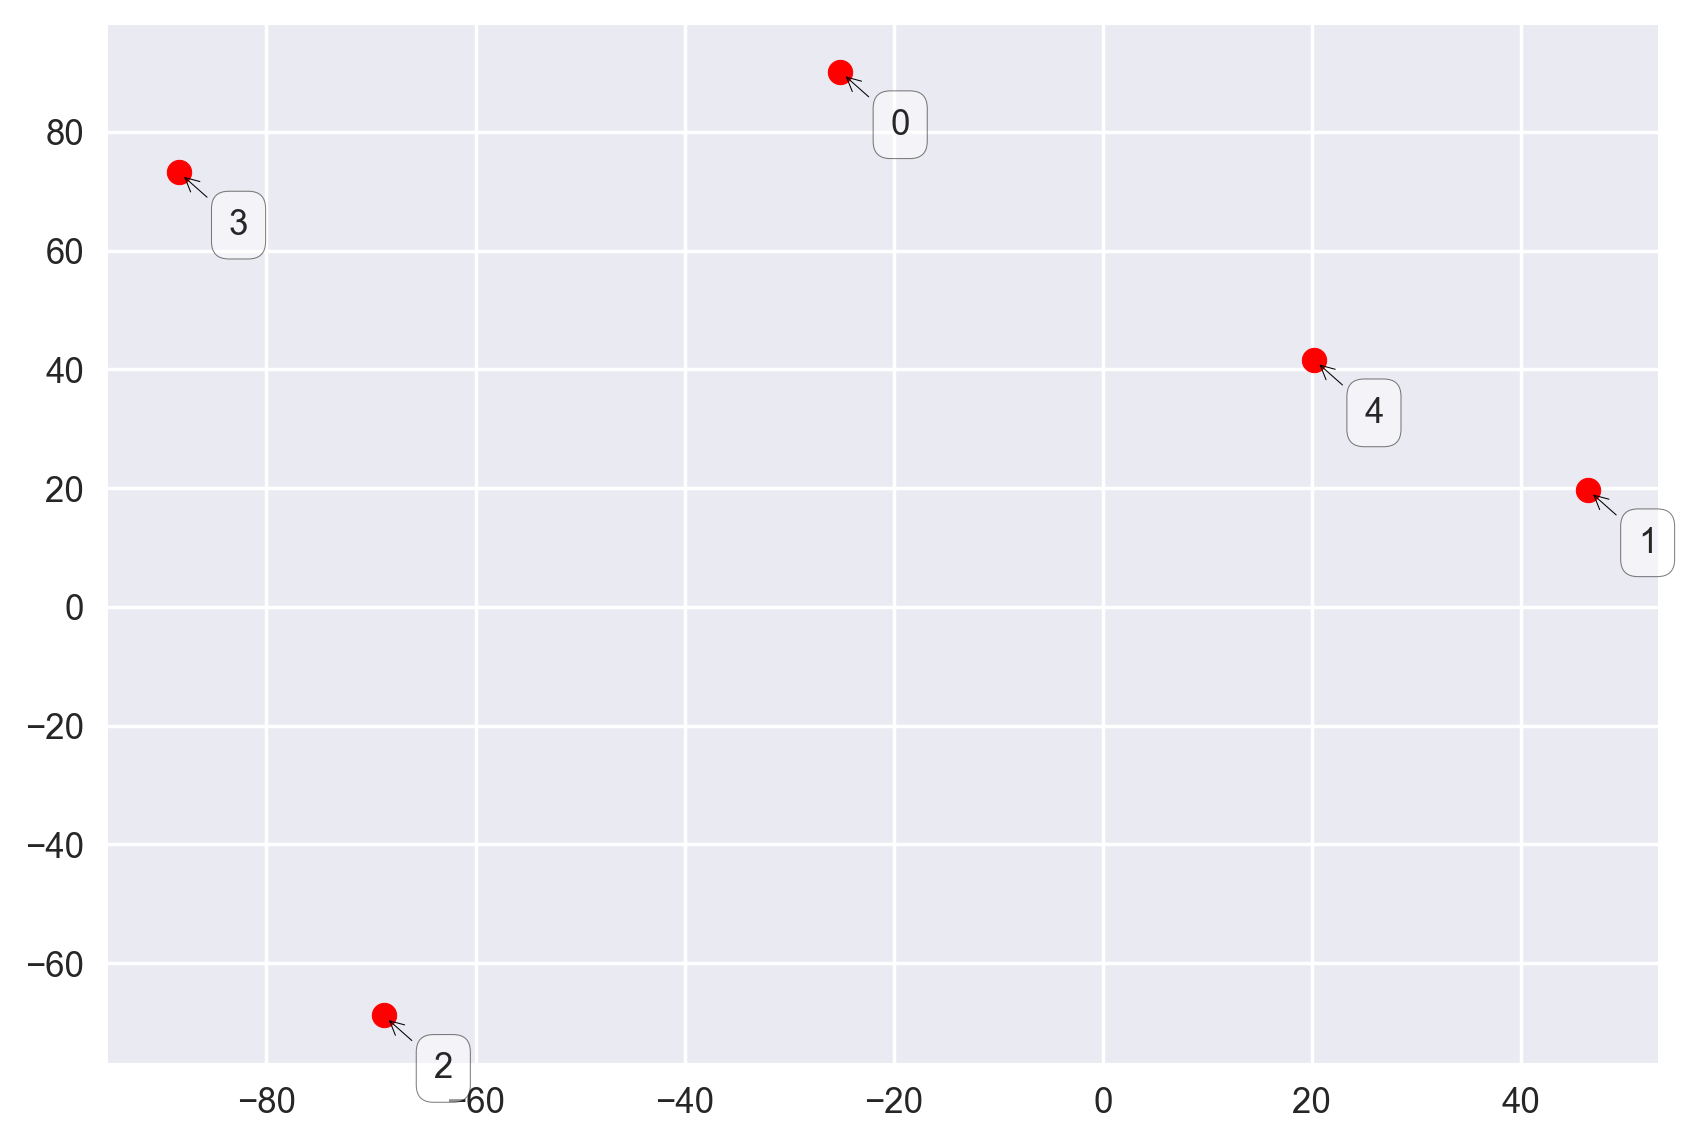

In [4]:
np.random.seed(42)

def make_cities(number_of_cities = 5):
    city_coordinates = {}

    for ix in range(number_of_cities):
        city_coordinates[ix] = list(np.random.uniform(-100,100,size=2))
        
    return city_coordinates

city_coordinates = make_cities()
print(city_coordinates)

def plot_cities(city_coordinates, annotate=True):
    """
    Makes a plot of all cities.
    Input: city_coordinates; dictionary of all cities and their coordinates in (x,y) format
    """
    names = []
    x = []
    y = []
    plt.figure(dpi=250)
    for ix, coord in city_coordinates.items():
        names.append(ix)
        x.append(coord[0])
        y.append(coord[1])
        if annotate:
            plt.annotate(ix, xy=(coord[0], coord[1]), xytext=(20, -20),
                        textcoords='offset points', ha='right', va='bottom',
                        bbox=dict(boxstyle='round,pad=0.5', fc='w', alpha=0.5),
                        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.scatter(x,y,c='r',marker='o')
            
plot_cities(city_coordinates)

In [5]:
print(list(city_coordinates.keys()))

[0, 1, 2, 3, 4]


In [6]:
from copy import copy
def create_guess(cities):
    """
    Creates a possible path between all cities, returning to the original.
    Input: List of City IDs
    """
    guess = copy(cities)
    np.random.shuffle(guess)
    guess.append(guess[0])
    return list(guess)

create_guess(list(city_coordinates.keys()))

[0, 2, 3, 1, 4, 0]

[4, 2, 0, 3, 1, 4]


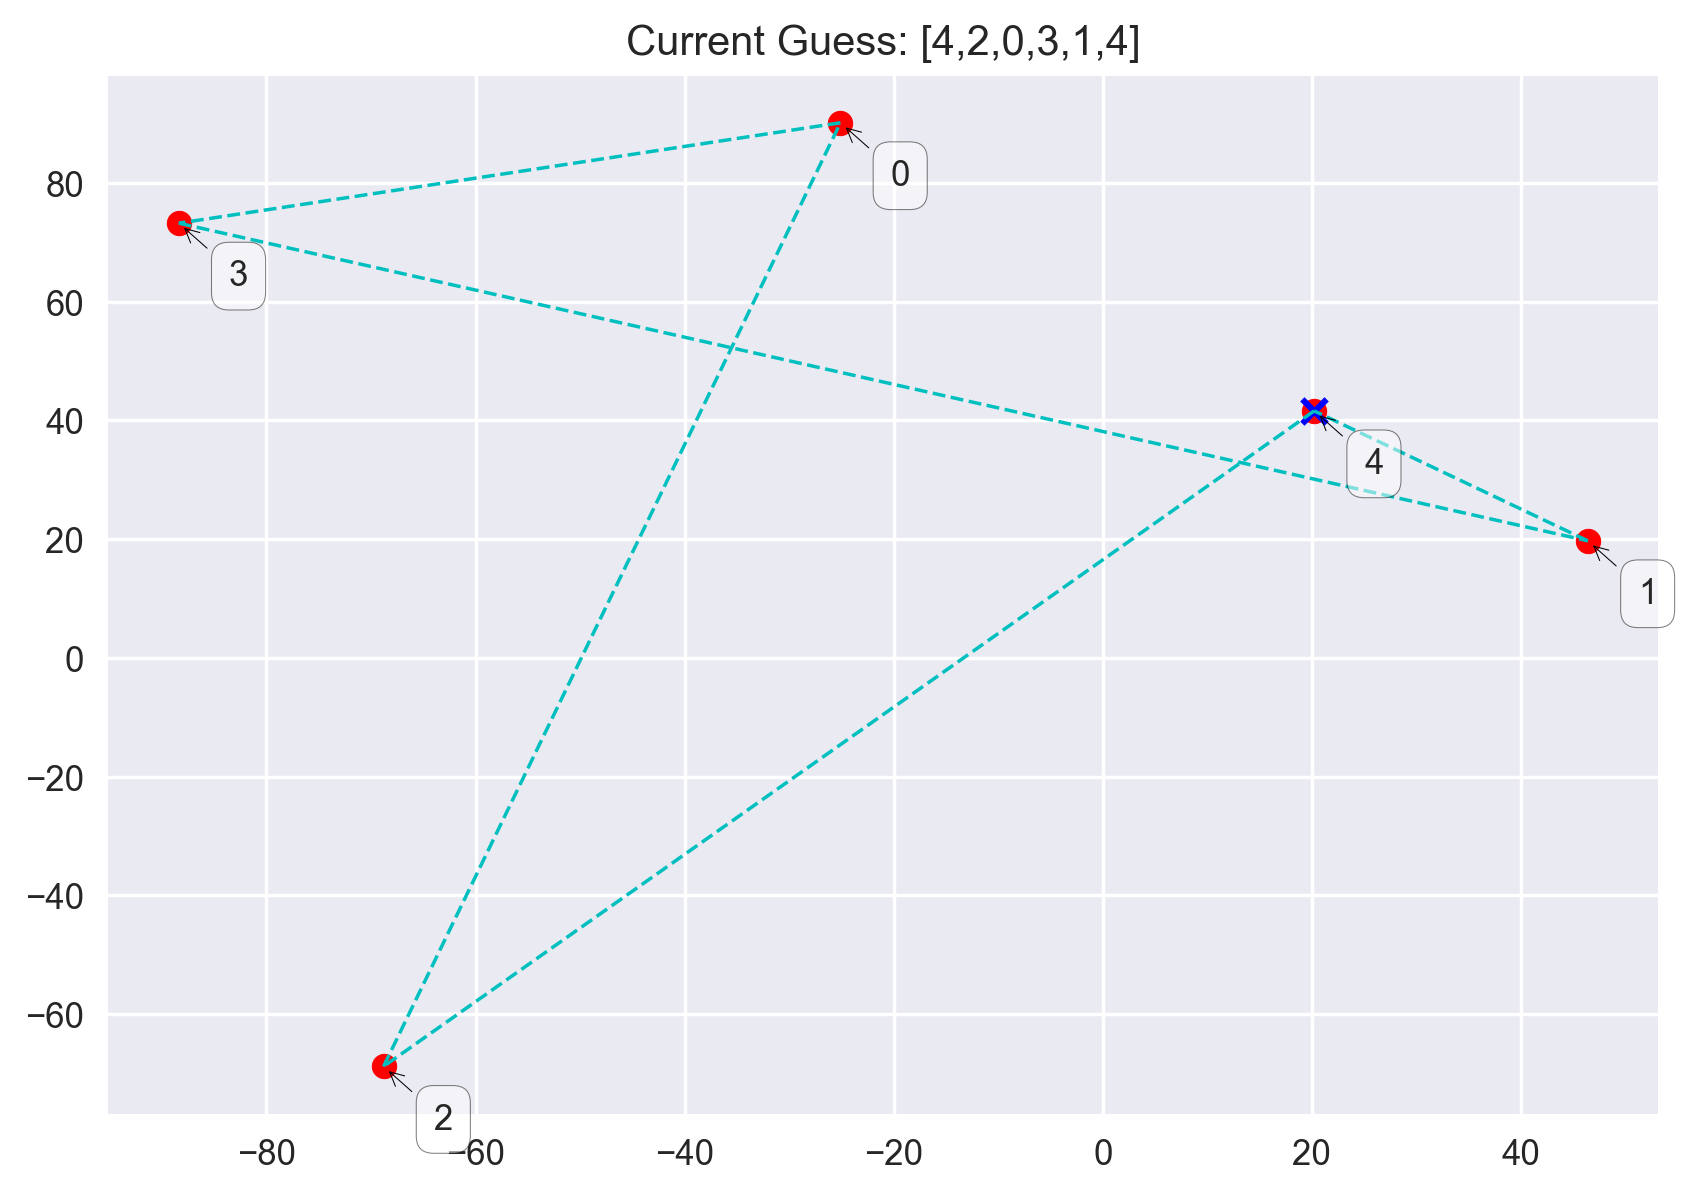

In [7]:
def plot_guess(city_coordinates, guess):
    plot_cities(city_coordinates)
    for ix, current_city in enumerate(guess[:-1]):
        x = [city_coordinates[guess[ix]][0],city_coordinates[guess[ix+1]][0]]
        y = [city_coordinates[guess[ix]][1],city_coordinates[guess[ix+1]][1]]
        plt.plot(x,y,'c--',lw=1)
    plt.scatter(city_coordinates[guess[0]][0],city_coordinates[guess[0]][1], marker='x', c='b')   
    plt.title("Current Guess: [%s]"%(','.join([str(x) for x in guess])))

path = create_guess(list(city_coordinates.keys()))
print(path)
plot_guess(city_coordinates, path)

In [8]:
def create_generation(cities, population=100):
    generation = [create_guess(cities) for _ in range(population)]
    return generation

test_generation = create_generation(list(city_coordinates.keys()), population=10)
print(test_generation)

[[2, 0, 4, 1, 3, 2], [1, 2, 4, 0, 3, 1], [0, 3, 1, 4, 2, 0], [0, 1, 2, 4, 3, 0], [0, 1, 4, 3, 2, 0], [1, 3, 4, 2, 0, 1], [3, 1, 2, 0, 4, 3], [4, 2, 1, 0, 3, 4], [2, 3, 4, 0, 1, 2], [0, 4, 2, 3, 1, 0]]


In [9]:
print(city_coordinates)

{0: [-25.091976230527507, 90.142861281983244], 1: [46.39878836228101, 19.73169683940732], 2: [-68.79627191151269, -68.801095932759466], 3: [-88.383277566360107, 73.235229154987024], 4: [20.223002348641756, 41.61451555920911]}


In [10]:
def distance_between_cities(city1_id, city2_id):
    """
    Given two cities, this calculates this distance between them
    """
    c1 = city_coordinates[city1_id]
    c2 = city_coordinates[city2_id]
    distance = np.sqrt((c1[0]-c2[0])**2 + (c1[1]-c2[1])**2)
    return distance

def fitness_score(guess):
    """
    a simple function that scores them on how many of the characters are in the correct position.
    1 point is awarded per correct character in correct position.
    """
    score = 0
    for ix, city_id in enumerate(guess[:-1]):
        score += distance_between_cities(city_id, guess[ix+1])
    return score

def check_fitness(guesses):
    """
    Goes through every guess and calculates the fitness score. 
    Returns a list of tuples: (guess, fitness_score)
    """
    fitness_indicator = []
    for guess in guesses:
        fitness_indicator.append((guess, fitness_score(guess)))
    return fitness_indicator

print(check_fitness(test_generation))

[([2, 0, 4, 1, 3, 2], 553.75083654065998), ([1, 2, 4, 0, 3, 1], 564.03689643049483), ([0, 3, 1, 4, 2, 0], 551.31595182456044), ([0, 1, 2, 4, 3, 0], 566.0860988216524), ([0, 1, 4, 3, 2, 0], 555.80003893181754), ([1, 3, 4, 2, 0, 1], 665.14589800533054), ([3, 1, 2, 0, 4, 3], 634.65407671097091), ([4, 2, 1, 0, 3, 4], 566.0860988216524), ([2, 3, 4, 0, 1, 2], 568.52098353775182), ([0, 4, 2, 3, 1, 0], 596.96360244095399)]


Now we need to setup a breeding program. So what does that entail? Per the blog, the best method is to take the strongest N guesses, plus some random ones for genetic diversity, and then do the breeding. The simplest way to do the breeding is to go character by character and randomly choose from between two parents. Let's see what that looks like.

In [11]:
def get_breeders_from_generation(guesses, take_best_N=10, take_random_N=5, verbose=False, mutation_rate=0.1):
    """
    This sets up the breeding group for the next generation. You have
    to be very careful how many breeders you take, otherwise your
    population can explode. These two, plus the "number of children per couple"
    in the make_children function must be tuned to avoid exponential growth or decline!
    """
    # First, get the top guesses from last time
    fit_scores = check_fitness(guesses)
    sorted_guesses = sorted(fit_scores, key=lambda x: x[1])
    new_generation = [x[0] for x in sorted_guesses[:take_best_N]]
    best_guess = new_generation[0]
    
    if verbose:
        # If we want to see what the best current guess is!
        print(best_guess)
    
    # Second, get some random ones for genetic diversity
    for _ in range(take_random_N):
        ix = np.random.randint(len(guesses))
        new_generation.append(guesses[ix])
        
    # Third, add any mutations
    # pass for now
    
    np.random.shuffle(new_generation)
    return new_generation, best_guess

def make_child(parent1, parent2):
    """ 
    Take some values from parent 1 and hold them in place, then merge in values
    from parent2, filling in from left to right with cities that aren't alraedy in 
    the child.
    """
    list_of_ids_for_parent1 = list(np.random.choice(parent1, replace=False, size=len(parent1)//2))
    child = [-99 for _ in parent1]
    
    for ix in list_of_ids_for_parent1:
        child[ix] = parent1[ix]
    for ix, gene in enumerate(child):
        if gene == -99:
            for gene2 in parent2:
                if gene2 not in child:
                    child[ix] = gene2
                    break
    child[-1] = child[0]
    return child

def make_children(old_generation, children_per_couple=1):
    """
    Pairs parents together, and makes children for each pair. 
    If there are an odd number of parent possibilities, one 
    will be left out. 
    
    Pairing happens by pairing the first and last entries. 
    Then the second and second from last, and so on.
    """
    mid_point = len(old_generation)//2
    next_generation = [] 
    
    for ix, parent in enumerate(old_generation[:mid_point]):
        for _ in range(children_per_couple):
            next_generation.append(make_child(parent, old_generation[-ix-1]))
    return next_generation

In [12]:
make_child([0,1,2,3,4,5],[6,7,8,9,10,11])

[0, 1, 2, 6, 7, 0]

Let's look at a test cycle with our test_generation.

In [13]:
breeders, _ = get_breeders_from_generation(test_generation)
print(breeders)

[[0, 3, 1, 4, 2, 0], [0, 1, 4, 3, 2, 0], [0, 4, 2, 3, 1, 0], [2, 0, 4, 1, 3, 2], [3, 1, 2, 0, 4, 3], [0, 1, 2, 4, 3, 0], [2, 3, 4, 0, 1, 2], [0, 1, 2, 4, 3, 0], [0, 1, 2, 4, 3, 0], [1, 2, 4, 0, 3, 1], [1, 3, 4, 2, 0, 1], [1, 2, 4, 0, 3, 1], [4, 2, 1, 0, 3, 4], [4, 2, 1, 0, 3, 4], [2, 0, 4, 1, 3, 2]]


In [14]:
print(make_children(breeders, children_per_couple=2))

[[0, 3, 1, 2, 4, 0], [2, 3, 1, 4, 0, 2], [0, 4, 1, 3, 2, 0], [0, 1, 4, 3, 2, 0], [4, 0, 2, 3, 1, 4], [0, 4, 2, 3, 1, 0], [2, 0, 4, 1, 3, 2], [2, 0, 4, 1, 3, 2], [1, 3, 2, 0, 4, 1], [1, 3, 2, 0, 4, 1], [0, 1, 2, 4, 3, 0], [2, 1, 0, 4, 3, 2], [2, 3, 1, 0, 4, 2], [2, 3, 1, 0, 4, 2]]


Sweet, it looks like our parents features are being carried on, but aren't being directly copies. So all is going how we hoped for now. Now let's try actually solving the problem by letting many generations happen and turning up how many guesses there are in the initial generation. We'll also change the password here to something easier to tell whether the algorithm is working.

In [16]:
current_generation = create_generation(list(city_coordinates.keys()),population=500)
print_every_n_generations = 5

for i in range(100):
    if not i % print_every_n_generations:
        print("Generation %i: "%i, end='')
        print(len(current_generation))
        is_verbose = True
    else:
        is_verbose = False
    breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                        take_best_N=250, take_random_N=100, 
                                                        verbose=is_verbose)
    current_generation = make_children(breeders, children_per_couple=3)
    

Generation 0: 500
[4, 0, 3, 2, 1, 4]
Generation 5: 525
[1, 4, 0, 3, 2, 1]
Generation 10: 525
[4, 0, 3, 2, 1, 4]
Generation 15: 525
[4, 0, 3, 2, 1, 4]
Generation 20: 525
[0, 3, 2, 1, 4, 0]
Generation 25: 525
[0, 3, 2, 1, 4, 0]
Generation 30: 525
[0, 3, 2, 1, 4, 0]
Generation 35: 525
[0, 3, 2, 1, 4, 0]
Generation 40: 525
[0, 3, 2, 1, 4, 0]
Generation 45: 525
[0, 3, 2, 1, 4, 0]
Generation 50: 525
[0, 3, 2, 1, 4, 0]
Generation 55: 525
[0, 3, 2, 1, 4, 0]
Generation 60: 525
[0, 3, 2, 1, 4, 0]
Generation 65: 525
[0, 3, 2, 1, 4, 0]
Generation 70: 525
[0, 3, 2, 1, 4, 0]
Generation 75: 525
[0, 3, 2, 1, 4, 0]
Generation 80: 525
[0, 3, 2, 1, 4, 0]
Generation 85: 525
[0, 3, 2, 1, 4, 0]
Generation 90: 525
[0, 3, 2, 1, 4, 0]
Generation 95: 525
[0, 3, 2, 1, 4, 0]


Let's put this into a function so we can repeat it with different sets of stuff.

In [17]:
def evolve_to_solve(current_generation, max_generations, take_best_N, take_random_N,
                    mutation_rate, children_per_couple, print_every_n_generations, verbose=False):
    fitness_tracking = []
    for i in range(max_generations):
        if verbose and not i % print_every_n_generations and i > 0:
            print("Generation %i: "%i, end='')
            print(len(current_generation))
            print("Current Best Score: ", fitness_tracking[-1])
            is_verbose = True
        else:
            is_verbose = False
        breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                            take_best_N=take_best_N, take_random_N=take_random_N, 
                                                            verbose=is_verbose, mutation_rate=mutation_rate)
        fitness_tracking.append(fitness_score(best_guess))
        current_generation = make_children(breeders, children_per_couple=children_per_couple)
    
    return fitness_tracking, best_guess

current_generation = create_generation([0,1,2,3,4],population=500)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 100, 150, 70, 0.5, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  454.691037357
[1, 4, 0, 3, 2, 1]
Generation 10: 330
Current Best Score:  454.691037357
[4, 0, 3, 2, 1, 4]
Generation 15: 330
Current Best Score:  454.691037357
[4, 0, 3, 2, 1, 4]
Generation 20: 330
Current Best Score:  454.691037357
[1, 4, 0, 3, 2, 1]
Generation 25: 330
Current Best Score:  454.691037357
[4, 0, 3, 2, 1, 4]
Generation 30: 330
Current Best Score:  454.691037357
[4, 0, 3, 2, 1, 4]
Generation 35: 330
Current Best Score:  454.691037357
[0, 4, 1, 2, 3, 0]
Generation 40: 330
Current Best Score:  454.691037357
[0, 4, 1, 2, 3, 0]
Generation 45: 330
Current Best Score:  454.691037357
[0, 4, 1, 2, 3, 0]
Generation 50: 330
Current Best Score:  454.691037357
[0, 4, 1, 2, 3, 0]
Generation 55: 330
Current Best Score:  454.691037357
[0, 4, 1, 2, 3, 0]
Generation 60: 330
Current Best Score:  454.691037357
[0, 4, 1, 2, 3, 0]
Generation 65: 330
Current Best Score:  454.691037357
[0, 4, 1, 2, 3, 0]
Generation 70: 330
Current Best Score:  454.69103735

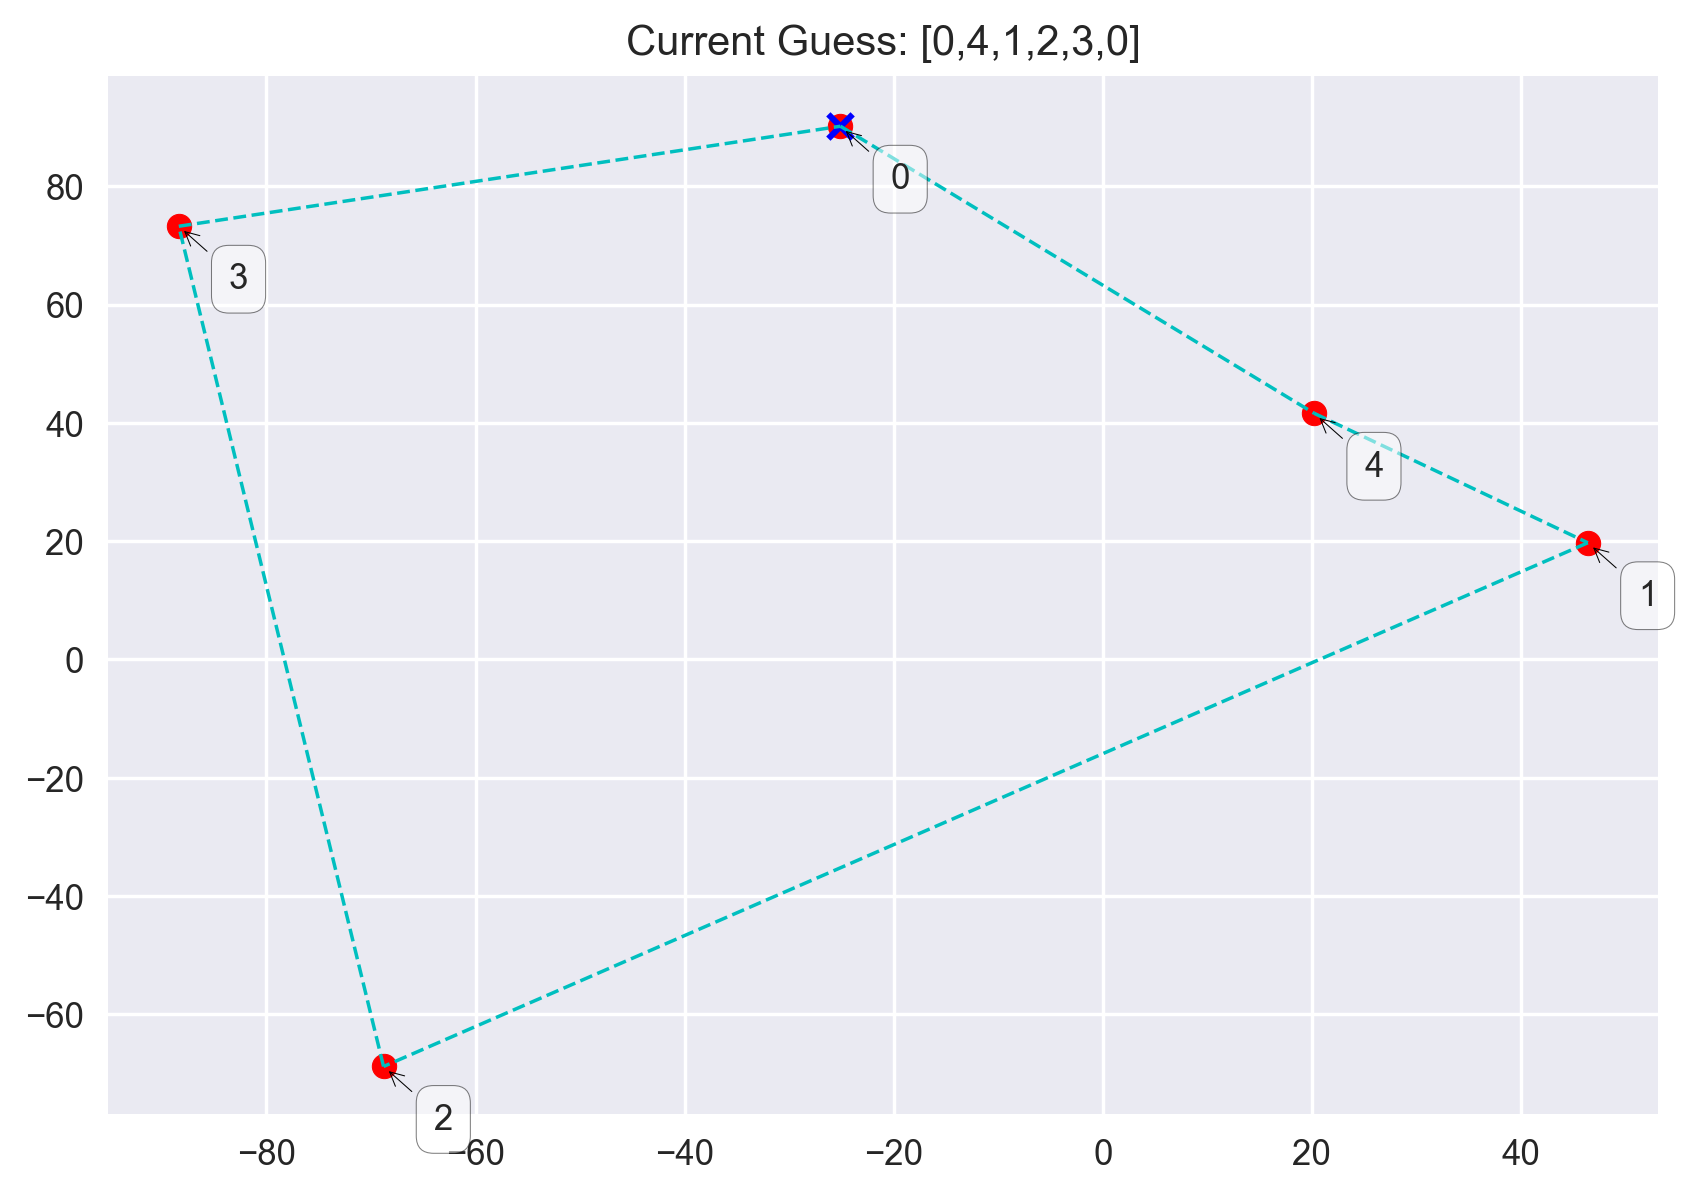

In [18]:
plot_guess(city_coordinates, best_guess)

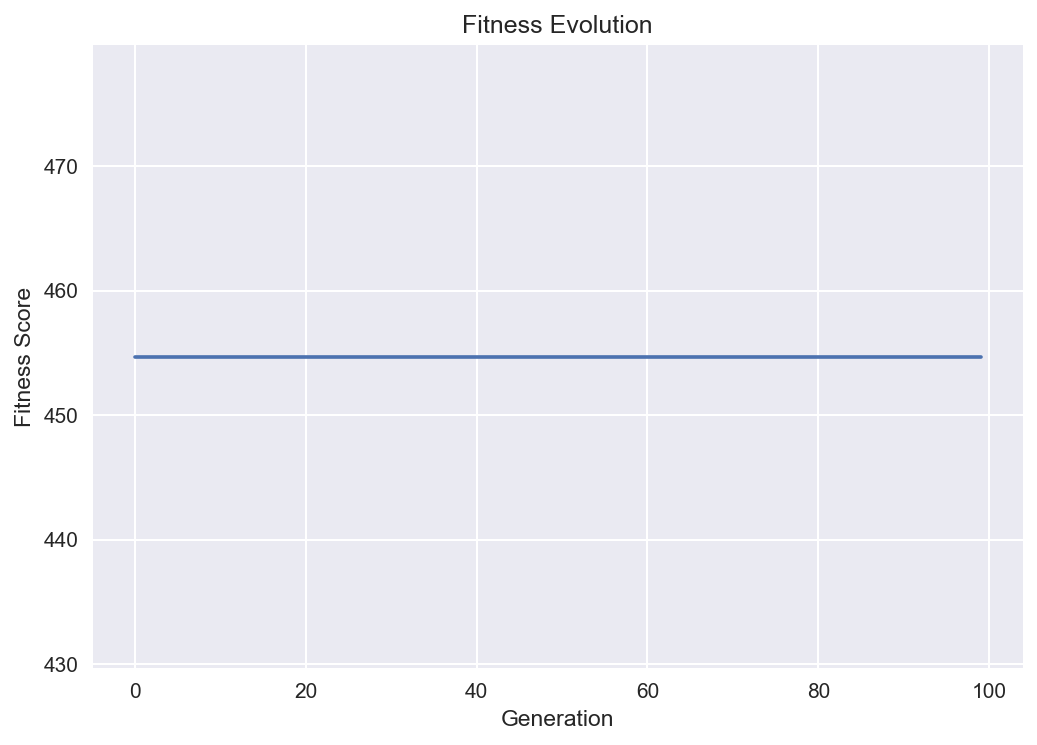

In [19]:
def make_fitness_tracking_plot(fitness_tracking):
    plt.figure(dpi=150)
    plt.plot(range(len(fitness_tracking)), fitness_tracking)
    plt.ylabel("Fitness Score")
    plt.xlabel("Generation")
    plt.title("Fitness Evolution");

make_fitness_tracking_plot(fitness_tracking)

# Now let's try it with a bigger more realisticly challenging problem

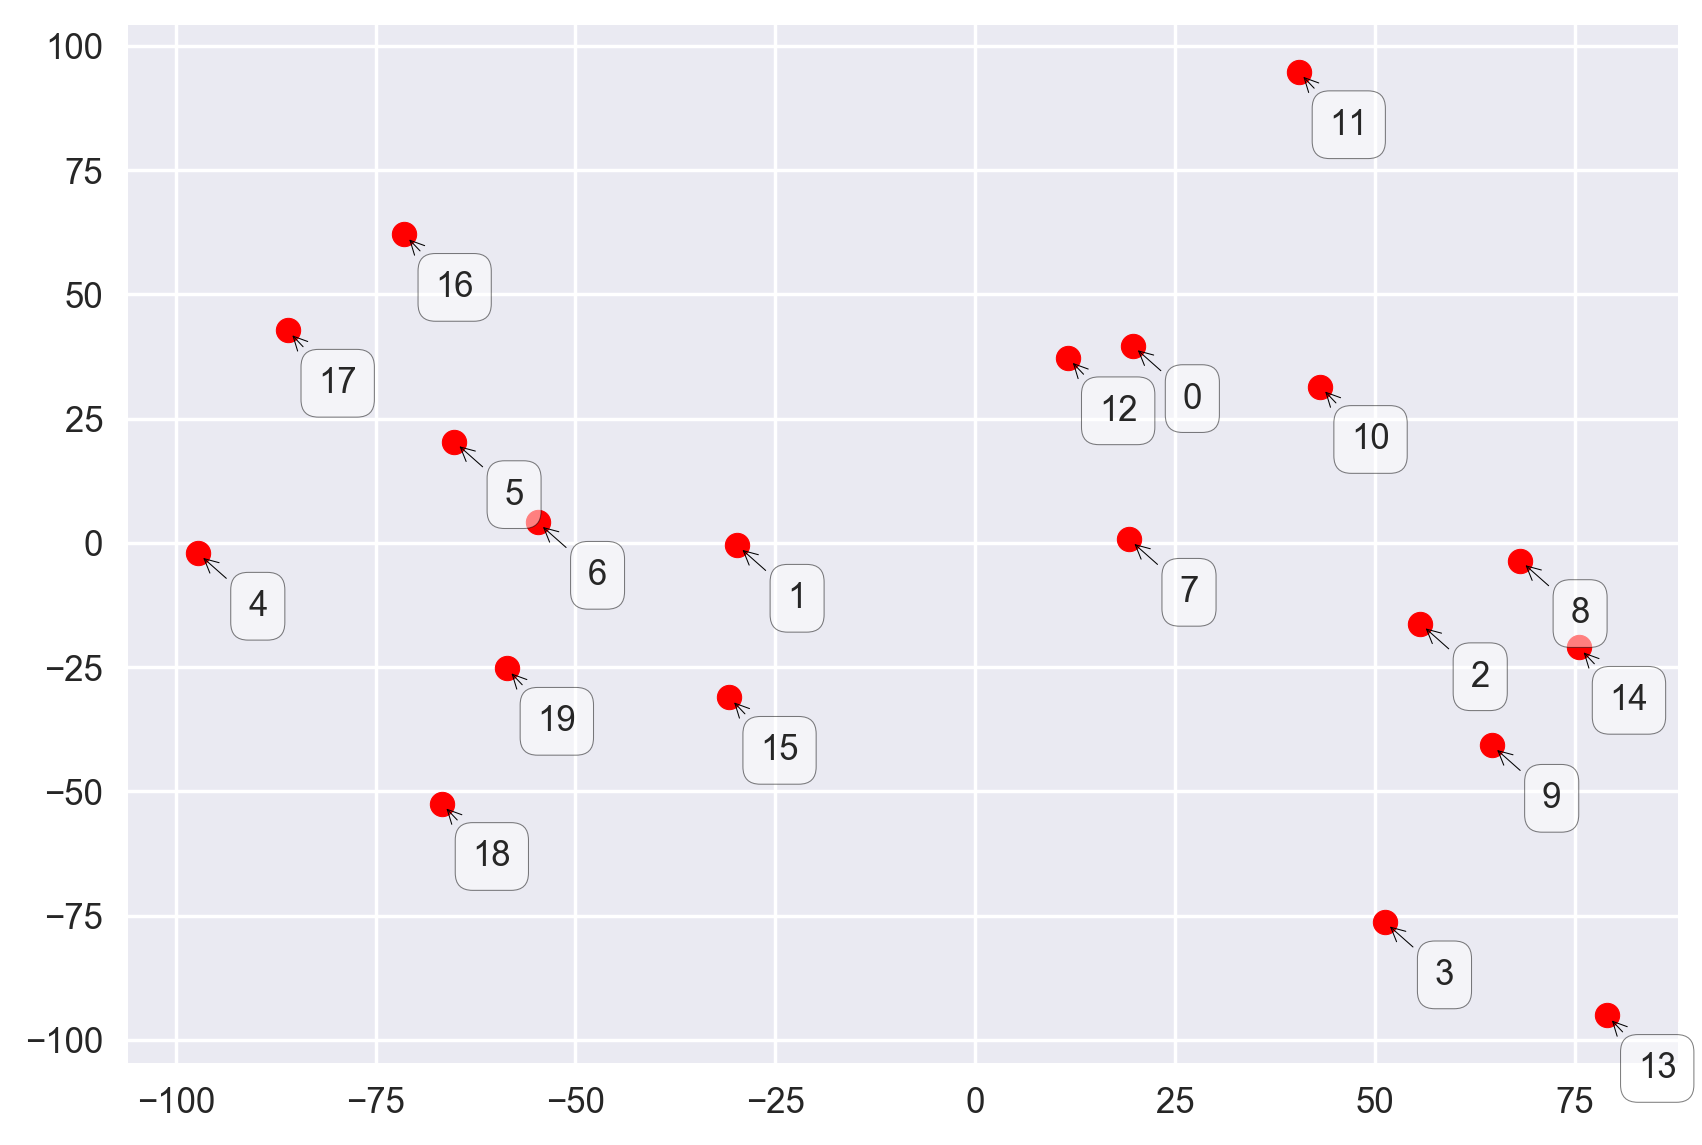

In [23]:
city_coordinates = make_cities(20)
plot_cities(city_coordinates)

In [24]:
current_generation = create_generation(list(city_coordinates.keys()),population=500)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 500, 150, 70, 0.5, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  1384.08952121
[19, 9, 3, 8, 14, 7, 4, 6, 18, 1, 5, 16, 17, 15, 0, 2, 10, 11, 12, 13, 19]
Generation 10: 330
Current Best Score:  1193.79772556
[11, 4, 6, 5, 16, 10, 2, 17, 19, 18, 1, 15, 0, 14, 9, 13, 3, 8, 7, 12, 11]
Generation 15: 330
Current Best Score:  1453.94779899
[0, 13, 17, 4, 19, 18, 5, 16, 10, 12, 9, 3, 15, 6, 1, 8, 14, 2, 7, 11, 0]
Generation 20: 330
Current Best Score:  1280.16475276
[0, 10, 12, 11, 8, 19, 4, 18, 15, 1, 6, 17, 2, 16, 5, 7, 14, 13, 3, 9, 0]
Generation 25: 330
Current Best Score:  1274.67910884
[0, 1, 5, 17, 12, 10, 6, 4, 18, 19, 16, 11, 3, 13, 14, 8, 15, 9, 2, 7, 0]
Generation 30: 330
Current Best Score:  1188.28244529
[0, 11, 12, 4, 18, 7, 5, 16, 17, 19, 6, 15, 1, 13, 3, 2, 9, 8, 14, 10, 0]
Generation 35: 330
Current Best Score:  957.398198415
[0, 11, 16, 5, 6, 4, 17, 15, 18, 19, 1, 7, 12, 8, 13, 3, 9, 14, 2, 10, 0]
Generation 40: 330
Current Best Score:  991.095710415
[0, 12, 17, 16, 5, 6, 15, 18, 19, 4, 1, 8, 9, 2, 

Current Best Score:  801.776676478
[0, 12, 16, 17, 4, 5, 6, 1, 19, 18, 15, 3, 13, 9, 14, 8, 2, 7, 10, 11, 0]
Generation 330: 330
Current Best Score:  801.776676478
[0, 12, 16, 17, 4, 5, 6, 1, 19, 18, 15, 3, 13, 9, 14, 8, 2, 7, 10, 11, 0]
Generation 335: 330
Current Best Score:  801.776676478
[0, 12, 16, 17, 4, 5, 6, 1, 19, 18, 15, 3, 13, 9, 14, 8, 2, 7, 10, 11, 0]
Generation 340: 330
Current Best Score:  801.776676478
[0, 12, 16, 17, 4, 5, 6, 1, 19, 18, 15, 3, 13, 9, 14, 8, 2, 7, 10, 11, 0]
Generation 345: 330
Current Best Score:  801.776676478
[0, 12, 16, 17, 4, 5, 6, 1, 19, 18, 15, 3, 13, 9, 14, 8, 2, 7, 10, 11, 0]
Generation 350: 330
Current Best Score:  801.776676478
[0, 12, 16, 17, 4, 5, 6, 1, 19, 18, 15, 3, 13, 9, 14, 8, 2, 7, 10, 11, 0]
Generation 355: 330
Current Best Score:  801.776676478
[0, 12, 16, 17, 4, 5, 6, 1, 19, 18, 15, 3, 13, 9, 14, 8, 2, 7, 10, 11, 0]
Generation 360: 330
Current Best Score:  801.776676478
[0, 12, 16, 17, 4, 5, 6, 1, 19, 18, 15, 3, 13, 9, 14, 8, 2, 7,

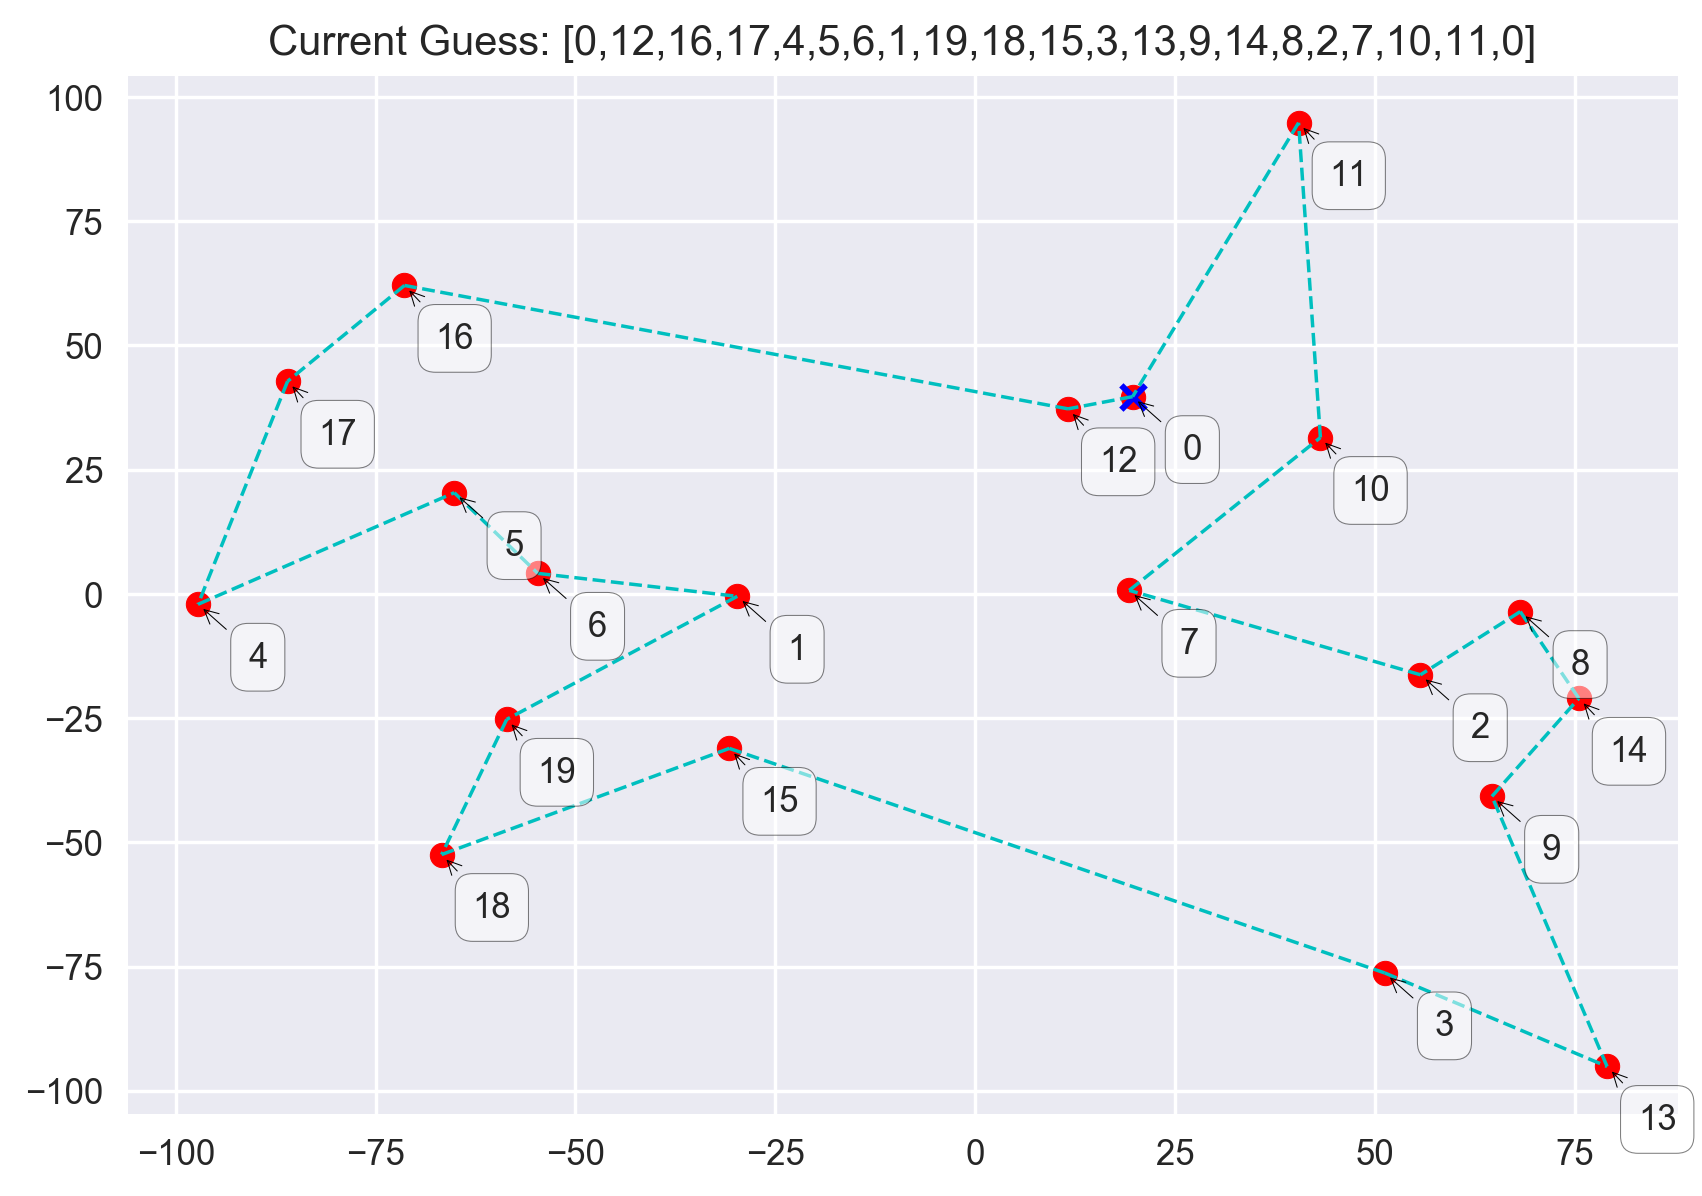

In [25]:
plot_guess(city_coordinates, best_guess)

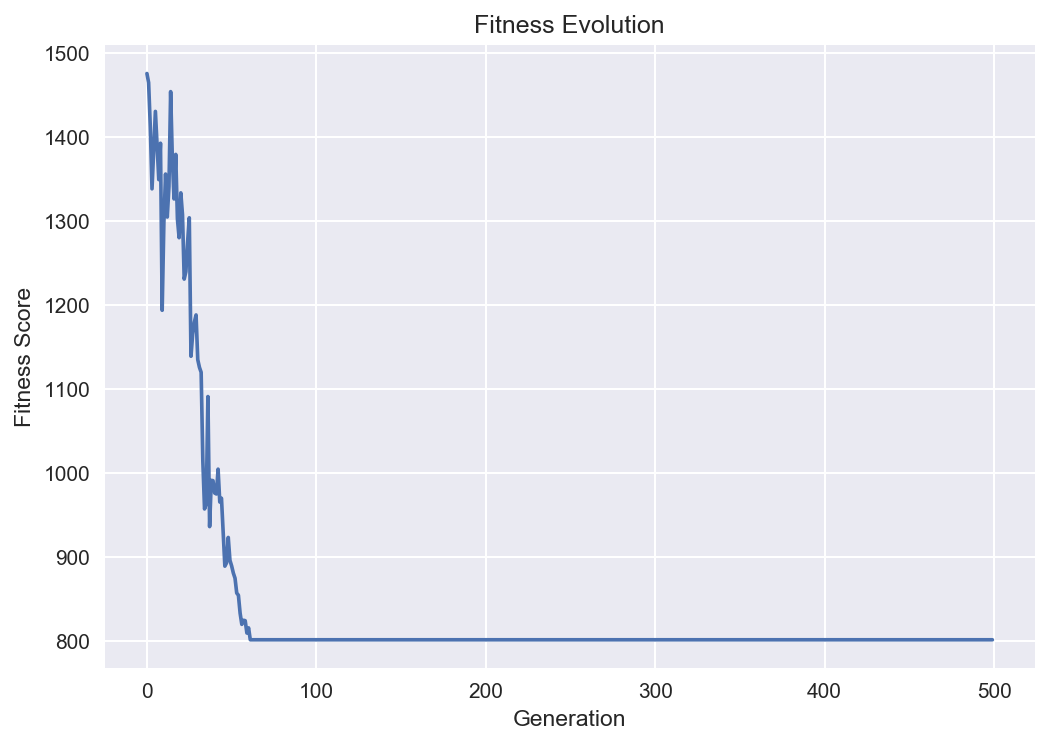

In [26]:
make_fitness_tracking_plot(fitness_tracking)

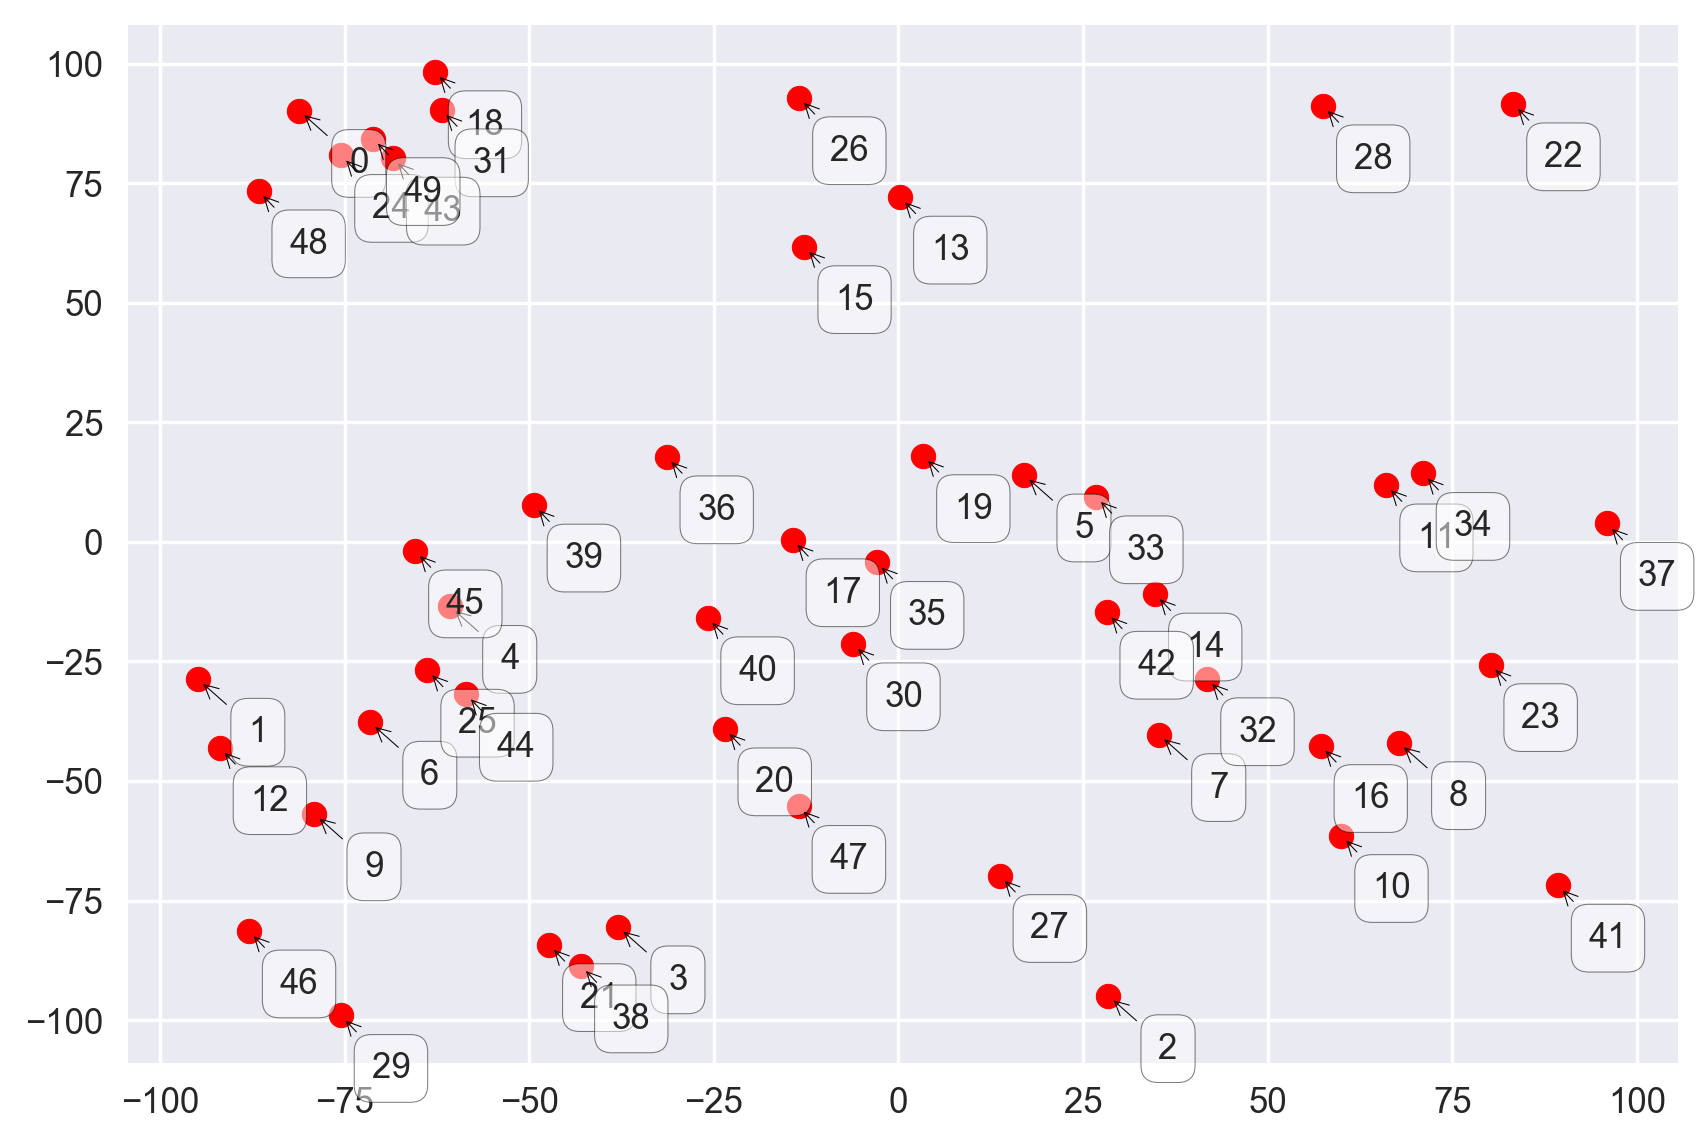

In [27]:
city_coordinates = make_cities(50)
plot_cities(city_coordinates)

In [28]:
current_generation = create_generation(list(city_coordinates.keys()),population=500)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 500, 150, 70, 0.5, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  4224.18546468
[20, 14, 17, 47, 9, 12, 4, 45, 18, 43, 35, 7, 27, 22, 34, 16, 42, 25, 37, 23, 33, 26, 29, 1, 46, 6, 24, 30, 13, 5, 2, 38, 0, 28, 15, 40, 49, 19, 21, 32, 11, 48, 31, 10, 41, 39, 36, 8, 3, 44, 20]
Generation 10: 330
Current Best Score:  3921.52636077
[27, 16, 13, 34, 33, 15, 25, 29, 8, 35, 24, 9, 17, 48, 19, 1, 18, 11, 28, 4, 44, 5, 42, 40, 38, 14, 32, 41, 7, 21, 12, 46, 39, 26, 0, 47, 31, 49, 36, 45, 20, 6, 43, 22, 37, 23, 30, 10, 3, 2, 27]
Generation 15: 330
Current Best Score:  4224.01991416
[4, 15, 48, 6, 1, 39, 44, 20, 36, 28, 22, 7, 9, 0, 13, 3, 29, 46, 12, 38, 34, 49, 31, 25, 26, 32, 33, 5, 30, 27, 10, 8, 14, 23, 41, 21, 16, 17, 43, 42, 47, 18, 40, 19, 2, 35, 11, 37, 24, 45, 4]
Generation 20: 330
Current Best Score:  4289.31849678
[39, 48, 15, 13, 14, 41, 5, 23, 2, 8, 19, 49, 31, 6, 25, 12, 42, 40, 37, 7, 27, 45, 9, 16, 22, 11, 17, 35, 47, 32, 30, 20, 38, 21, 3, 33, 4, 26, 10, 28, 29, 36, 46, 1, 24, 43, 0, 18, 44, 34, 39]
Genera

Generation 170: 330
Current Best Score:  1274.21933909
[0, 48, 24, 49, 43, 31, 18, 26, 15, 13, 28, 22, 37, 34, 11, 33, 42, 32, 7, 16, 8, 23, 41, 10, 2, 27, 47, 20, 3, 38, 21, 29, 46, 9, 12, 1, 6, 44, 25, 4, 45, 39, 40, 30, 35, 14, 5, 19, 17, 36, 0]
Generation 175: 330
Current Best Score:  1275.49425339
[0, 48, 24, 49, 43, 31, 18, 26, 15, 13, 28, 22, 37, 34, 11, 33, 42, 32, 7, 16, 8, 23, 41, 10, 2, 27, 47, 20, 3, 38, 21, 29, 46, 9, 12, 1, 6, 44, 25, 4, 45, 39, 40, 17, 35, 30, 14, 5, 19, 36, 0]
Generation 180: 330
Current Best Score:  1275.49425339
[0, 48, 24, 49, 43, 31, 18, 26, 15, 13, 28, 22, 37, 34, 11, 33, 42, 32, 7, 16, 8, 23, 41, 10, 2, 27, 47, 20, 3, 38, 21, 29, 46, 9, 12, 1, 6, 44, 25, 4, 45, 39, 40, 17, 35, 30, 14, 5, 19, 36, 0]
Generation 185: 330
Current Best Score:  1275.49425339
[0, 48, 24, 49, 43, 31, 18, 26, 15, 13, 28, 22, 37, 34, 11, 33, 42, 32, 7, 16, 8, 23, 41, 10, 2, 27, 47, 20, 3, 38, 21, 29, 46, 9, 12, 1, 6, 44, 25, 4, 45, 39, 40, 17, 35, 30, 14, 5, 19, 36, 0]
Gene

Generation 335: 330
Current Best Score:  1275.49425339
[0, 48, 24, 49, 43, 31, 18, 26, 15, 13, 28, 22, 37, 34, 11, 33, 42, 32, 7, 16, 8, 23, 41, 10, 2, 27, 47, 20, 3, 38, 21, 29, 46, 9, 12, 1, 6, 44, 25, 4, 45, 39, 40, 17, 35, 30, 14, 5, 19, 36, 0]
Generation 340: 330
Current Best Score:  1275.49425339
[0, 48, 24, 49, 43, 31, 18, 26, 15, 13, 28, 22, 37, 34, 11, 33, 42, 32, 7, 16, 8, 23, 41, 10, 2, 27, 47, 20, 3, 38, 21, 29, 46, 9, 12, 1, 6, 44, 25, 4, 45, 39, 40, 17, 35, 30, 14, 5, 19, 36, 0]
Generation 345: 330
Current Best Score:  1275.49425339
[0, 48, 24, 49, 43, 31, 18, 26, 15, 13, 28, 22, 37, 34, 11, 33, 42, 32, 7, 16, 8, 23, 41, 10, 2, 27, 47, 20, 3, 38, 21, 29, 46, 9, 12, 1, 6, 44, 25, 4, 45, 39, 40, 17, 35, 30, 14, 5, 19, 36, 0]
Generation 350: 330
Current Best Score:  1275.49425339
[0, 48, 24, 49, 43, 31, 18, 26, 15, 13, 28, 22, 37, 34, 11, 33, 42, 32, 7, 16, 8, 23, 41, 10, 2, 27, 47, 20, 3, 38, 21, 29, 46, 9, 12, 1, 6, 44, 25, 4, 45, 39, 40, 17, 35, 30, 14, 5, 19, 36, 0]
Gene

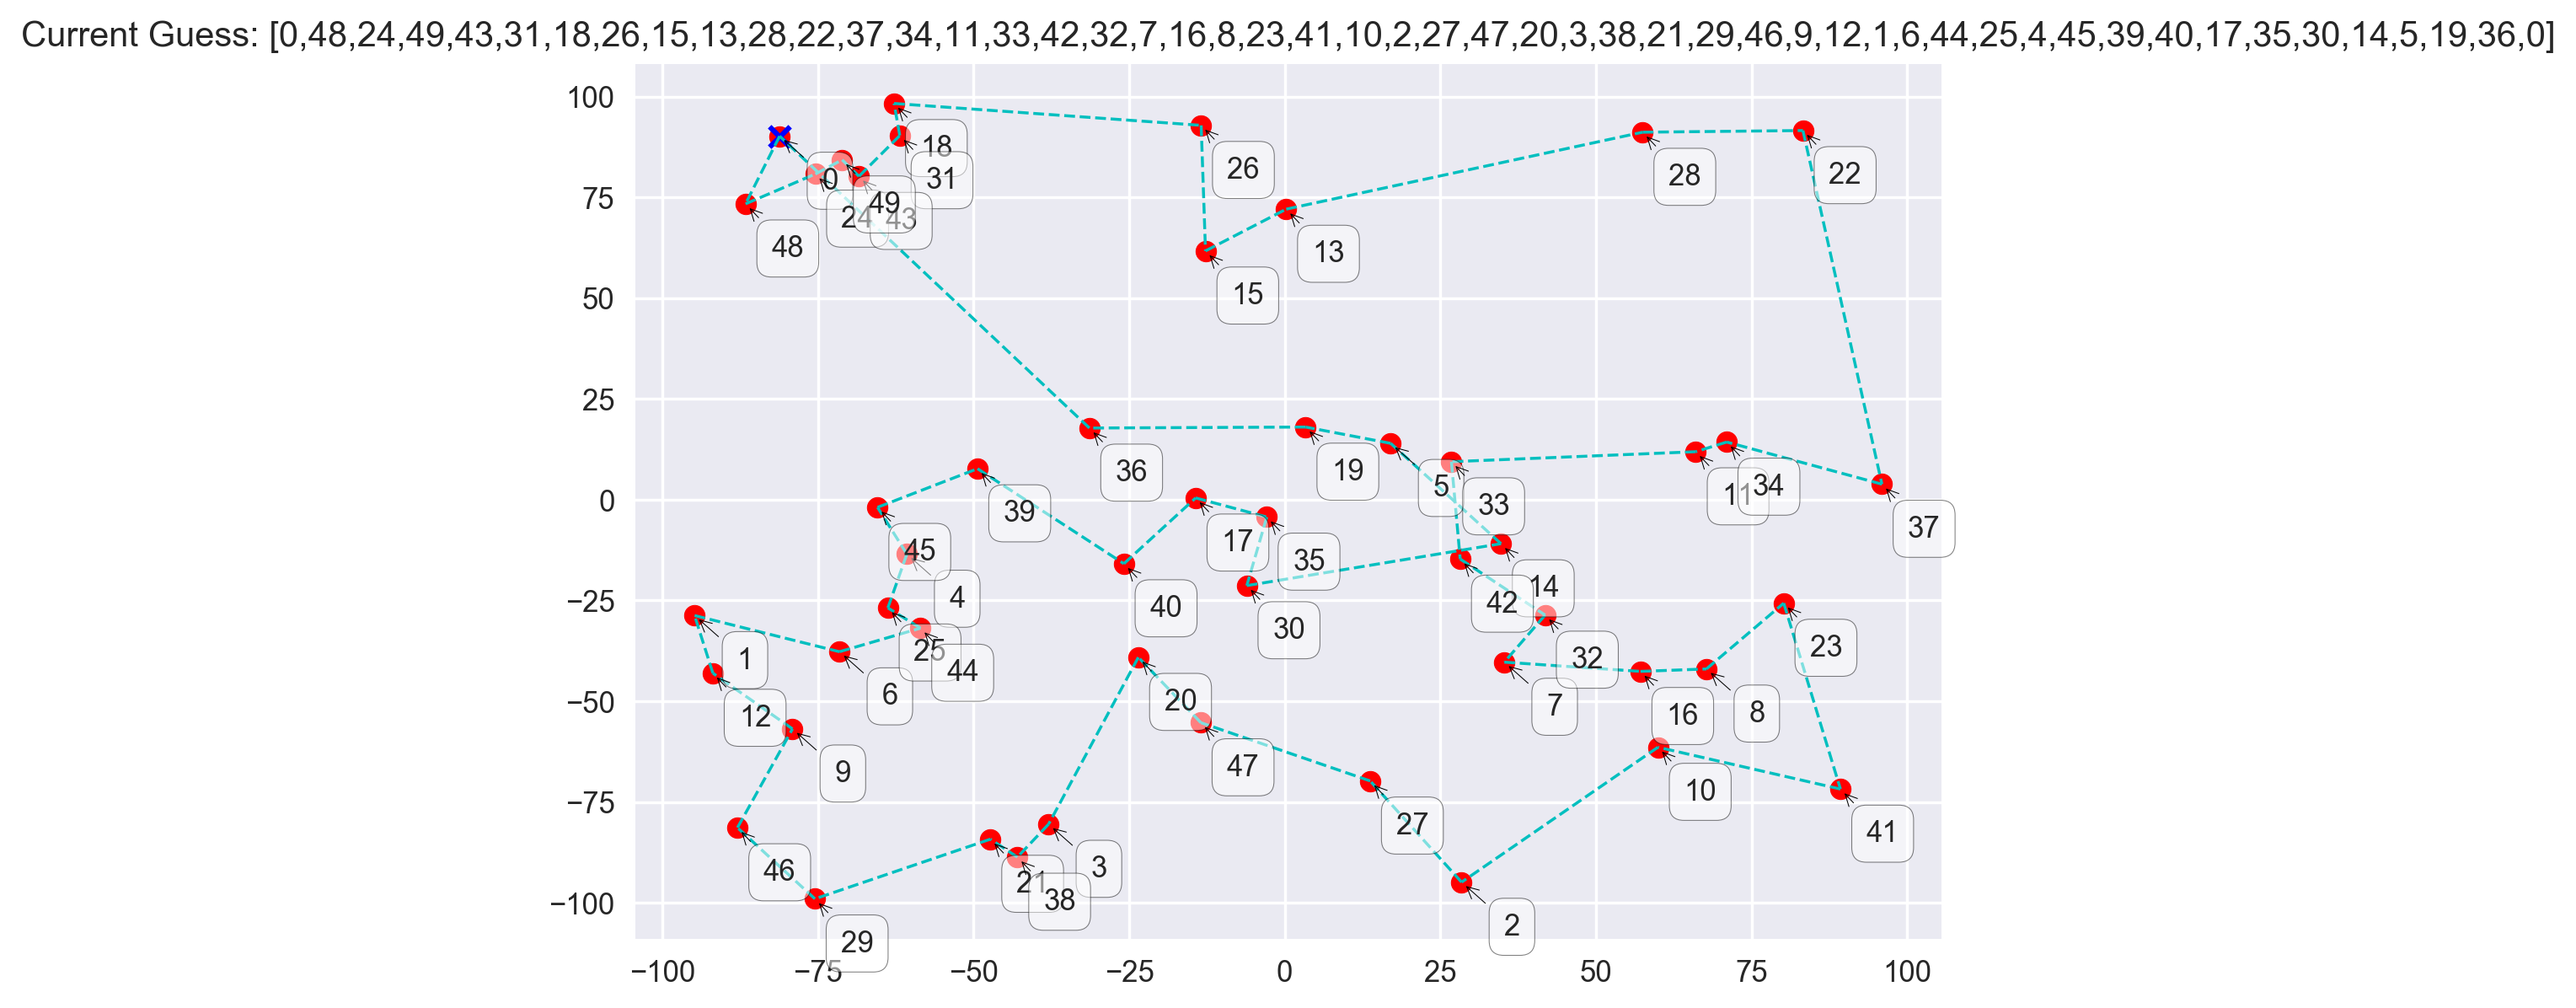

In [29]:
plot_guess(city_coordinates, best_guess)

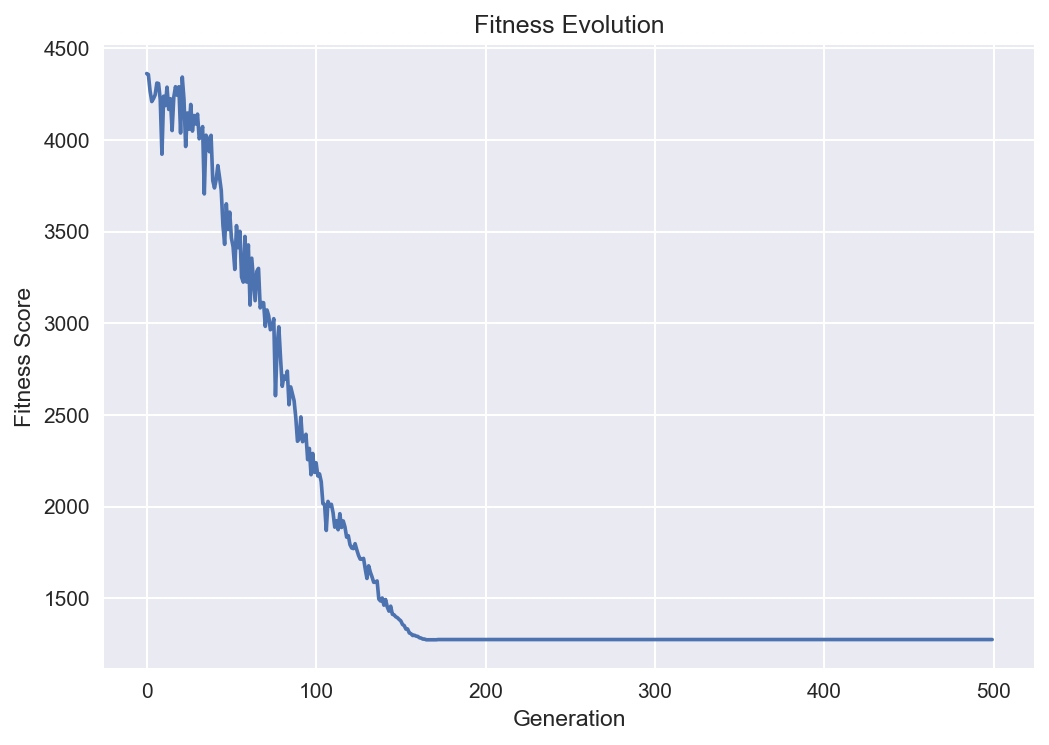

In [30]:
make_fitness_tracking_plot(fitness_tracking)